# Assignment-5 Data Analytics II
1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv("Social_Network_Ads.csv")

In [5]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
data.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
data.shape

(400, 3)

In [11]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

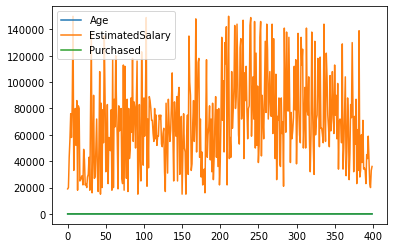

In [12]:
data.plot()

In [13]:
col=['Age','EstimatedSalary']

<AxesSubplot:>

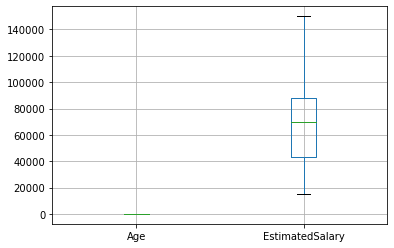

In [14]:
data.boxplot(col)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

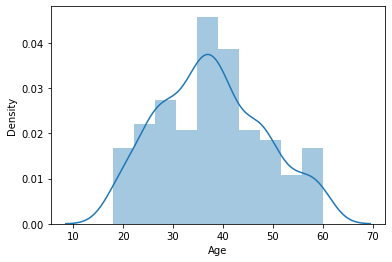

In [15]:
sns.distplot(data['Age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

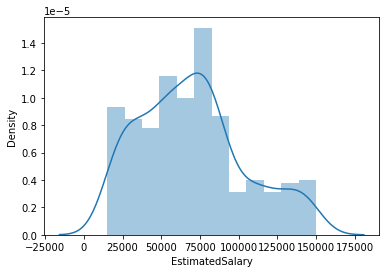

In [16]:
sns.distplot(data['EstimatedSalary'])

In [17]:
X=data.drop(['Purchased'],axis=1)
y=data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [19]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the StandardScaler instance to the training data and then transform it
# X_train is the feature matrix for the training set
# The fit method computes the mean and standard deviation to be used for later scaling
# The transform method performs standardization by centering and scaling
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same StandardScaler instance
# X_test is the feature matrix for the test set
# Note: We only use transform() here, not fit_transform(). This is because we want to apply the same transformation to the test set that we applied to the training set
X_test = scaler.transform(X_test)


In [20]:
X_train

array([[-0.03449842,  0.26845438],
       [ 0.06066963, -0.25929212],
       [-1.65235532,  0.12185813],
       [-0.98617895,  0.53232764],
       [-1.36685117, -1.22682738],
       [-0.51033869,  0.47368914],
       [-1.55718727,  0.53232764],
       [-0.8910109 ,  0.56164689],
       [-1.74752338, -1.28546588],
       [-0.60550674,  0.18049663],
       [ 1.77369459, -0.28861137],
       [-0.60550674, -0.05405737],
       [-0.22483453, -1.40274288],
       [ 2.05919875, -0.81635787],
       [-1.08134701,  0.29777364],
       [-1.84269143, -0.52316537],
       [ 1.48819043,  1.00143564],
       [-0.98617895,  0.59096614],
       [-0.60550674,  0.03390038],
       [-0.70067479,  0.29777364],
       [-0.8910109 ,  0.26845438],
       [-0.8910109 ,  0.44436989],
       [ 0.34617379,  0.06321963],
       [ 2.15436681, -1.05091188],
       [ 0.82201406,  0.35641214],
       [ 0.91718211, -1.05091188],
       [-0.41517063, -0.02473812],
       [-1.08134701, -1.60797763],
       [-0.12966647,

In [21]:
X_test

array([[ 0.44134185, -0.14201512],
       [-0.03449842,  0.03390038],
       [ 0.44134185,  0.59096614],
       [ 0.91718211, -0.66976162],
       [-1.36685117, -0.64044237],
       [ 1.9640307 , -1.37342363],
       [ 0.15583769, -0.81635787],
       [ 0.91718211, -0.78703862],
       [-0.22483453, -0.31793062],
       [ 0.15583769,  0.03390038],
       [ 0.34617379, -0.31793062],
       [-1.08134701,  1.41190514],
       [ 2.05919875,  1.76373615],
       [ 1.86886265, -1.28546588],
       [ 0.82201406, -1.37342363],
       [ 0.06066963,  0.03390038],
       [-0.8910109 ,  0.50300839],
       [-1.27168311, -0.34724987],
       [-0.70067479, -1.60797763],
       [ 0.15583769,  1.52918214],
       [-0.98617895, -0.46452687],
       [-1.55718727,  0.06321963],
       [-0.03449842,  0.15117738],
       [ 2.05919875,  0.53232764],
       [ 1.9640307 , -0.66976162],
       [-0.03449842, -0.43520762],
       [ 0.06066963, -0.31793062],
       [-0.03449842,  2.23284415],
       [ 1.01235017,

In [22]:
# Create an instance of the LogisticRegression class
logClassifier = LogisticRegression()

# Fit the model to the training data
# X_train is the feature matrix for the training set
# y_train is the target vector for the training set
logClassifier.fit(X_train, y_train) 


LogisticRegression()

In [23]:
y_pred_test = logClassifier.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [24]:
confusion_matrix(y_test, y_pred_test)

array([[48,  4],
       [ 5, 23]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.85      0.82      0.84        28

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



In [26]:
print("Accuracy : ", accuracy_score(y_test, y_pred_test))

Accuracy :  0.8875
